In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
import io
import requests
import json
# Access Twitter API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

## Gather

In [2]:
# WeRateDogs tweet archive
tweet_archive = pd.read_csv('/Users/jordanmazza/Desktop/Udacity Files/Project 4/twitter-archive-enhanced.csv')

In [3]:
# Tweet image predictions
url = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').content
tweet_images = pd.read_csv(io.StringIO(url.decode('utf-8')), delimiter='\t')

In [4]:
# Retrieve JSON files from Tweet ID
tweet_list = []
exceptions = []
for tweet_id in tweet_archive.tweet_id:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        tweet_list.append({'tweet_id': int(tweet_id),
               'favorite_count': int(tweet.favorite_count), 
               'retweet_count': int(tweet.retweet_count)})
    except Exception as e:
        exceptions.append(tweet_id)
        

print(exceptions)
print(tweet_list)

Rate limit reached. Sleeping for: 718
Rate limit reached. Sleeping for: 722


[888202515573088257, 873697596434513921, 872668790621863937, 872261713294495745, 869988702071779329, 866816280283807744, 861769973181624320, 856602993587888130, 851953902622658560, 845459076796616705, 844704788403113984, 842892208864923648, 837366284874571778, 837012587749474308, 829374341691346946, 827228250799742977, 812747805718642688, 802247111496568832, 779123168116150273, 775096608509886464, 771004394259247104, 770743923962707968, 759566828574212096, 754011816964026368, 680055455951884288]
[{'tweet_id': 892420643555336193, 'favorite_count': 35457, 'retweet_count': 7487}, {'tweet_id': 892177421306343426, 'favorite_count': 30694, 'retweet_count': 5557}, {'tweet_id': 891815181378084864, 'favorite_count': 23087, 'retweet_count': 3680}, {'tweet_id': 891689557279858688, 'favorite_count': 38720, 'retweet_count': 7656}, {'tweet_id': 891327558926688256, 'favorite_count': 36994, 'retweet_count': 8266}, {'tweet_id': 891087950875897856, 'favorite_count': 18645, 'retweet_count': 2764}, {'twee

In [5]:
#Dump JSON files to a .txt file
with open('tweet_json.txt', 'w') as file:
    for tweet in tweet_list:
        json.dump(tweet, file, default=str)
        file.write('\n')
    
tweets_array = []
with open ('tweet_json.txt', 'r') as txt_file:
    for line in txt_file:
        line_json = json.loads(line)
        tweets_array.append(line_json)

df_tweets = pd.DataFrame(tweets_array, columns = ['tweet_id','retweet_count', 'favorite_count'])
df_tweets.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           7487           35457
1  892177421306343426           5557           30694
2  891815181378084864           3680           23087
3  891689557279858688           7656           38720
4  891327558926688256           8266           36994

## Assessing
### Visual Assessment

In [6]:
# Twitter Archive
tweet_archive.head()
tweet_archive.tail()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2351                  10  None  None    None   None  None  
2352                  10     a  None    None   None  None  
2353                  10     a  None    None   None  None  
2354                  10     a  None    None   None  None  
2355                  10  None  None    None   None  None

In [7]:
# Twitter Images
tweet_images.head()
tweet_images.tail()

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
2070        2       basset  0.555712    True    English_springer  0.225770   
2071        1  paper_towel  0.170278   False  Labrador_retriever  0.168086   
2072        1    Chihuahua  0.716012    True            malamute  0.078253   
2073        1    Chihuahua  0.323581    True            Pekinese  0.090647   
2074        1       orange  0.097049   False               bagel  0.085851   

      p2_dog                           p3   p3_conf  p3_dog  
2070    True  German_short-haired_pointer  0.175219    True  
2071    True                      spatula  0.040836   False  
2072    True                       kelpie  0.031379    True  
2073    True                     papillon  0.068957    True  
2074   False                       banana  0.076110   False

In [8]:
# Tweet Dataframe
df_tweets.head()
df_tweets.tail()

tweet_id  retweet_count  favorite_count
2326  666049248165822465             40              96
2327  666044226329800704            125             264
2328  666033412701032449             39             109
2329  666029285002620928             41             119
2330  666020888022790149            453            2359

### Programmatic Assessment

In [9]:
# Twitter Archive
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
# Twitter Archive denominators
tweet_archive.rating_denominator.sort_values()
tweet_archive.query('rating_denominator != 10').shape

(23, 17)

In [11]:
# Twitter Archive numerators
tweet_archive.rating_numerator.sort_values()
tweet_archive.query('rating_numerator <=10 or rating_numerator >= 20').shape

(926, 17)

In [12]:
tweet_archive[tweet_archive['name'].duplicated()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
7     890729181411237888                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
7     2017-07-28 00:22:40 +0000   
12    2017-07-25 01:55:32 +0000   
23    2017-07-19 00:47:34 +0000   
24    2017-07-18 16:08:03 +0000   
25    2017-07-18 00:07:08 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
7     <a href="http://twitter.com/download/iphone" r...   
12    <a href="http://twitter.com/download/iphone" r...   
23    <a href="http://twitter.com/download/iphone" r...   
24    <a href="http://twitter.com/download/iphone" r...   
25    <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
7     When you watch your owner call another dog a g...                  NaN   
12    Here's a puppo that seems to be on the fence a...                  NaN   
23    This is Canela. She attempted some fancy porch...                  NaN   
24    You may not have known you needed to see this ...                  NaN   
25    This... is a Jubilant Antarctic House Bear. We...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
7                          NaN                        NaN   
12                         NaN                        NaN   
23                         NaN                        NaN   
24                         NaN                        NaN   
25                         NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
7     https://twitter.com/dog_rates/status/890729181...                13   
12    https://twitter.com/dog_rates/status/889665388...                13   
23    https://twitter.com/dog_rates/status/887473957...                13   
24    https://twitt

In [13]:
print(tweet_archive['doggo'].value_counts())
print(tweet_archive['floofer'].value_counts())
print(tweet_archive['pupper'].value_counts())
print(tweet_archive['puppo'].value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [14]:
# Twitter Archive URLs
tweet_archive.expanded_urls.sort_values()
tweet_archive[tweet_archive.expanded_urls.isnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
113   870726314365509632           8.707262e+17         1.648776e+07   
148   863427515083354112           8.634256e+17         7.759620e+07   
179   857214891891077121           8.571567e+17         1.806710e+08   
185   856330835276025856                    NaN                  NaN   
186   856288084350160898           8.562860e+17         2.792810e+08   
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
218   850333567704068097           8.503288e+17         2.195506e+07   
228   848213670039564288           8.482121e+17         4.196984e+09   
234   847617282490613760           8.476062e+17         4.196984e+09   
274   840698636975636481           8.406983e+17         8.405479e+17   
290   838150277551247360           8.381455e+17         2.195506e+07   
291   838085839343206401           8.380855e+17         2.894131e+09   
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
346   831926988323639298           8.319030e+17         2.068372e+07   
375   828361771580813312                    NaN                  NaN   
387   826598799820865537           8.265984e+17         4.196984e+09   
409   823333489516937216           8.233264e+17         1.582854e+09   
427   821153421864615936           8.211526e+17         1.132119e+08   
498   813130366689148928           8.131273e+17         4.196984e+09   
513   811647686436880384           8.116272e+17         4.196984e+09   
570   801854953262350336           8.018543e+17         1.185634e+07   
576   800859414831898624           8.008580e+17         2.918590e+08   
611   797165961484890113           7.971238e+17         2.916630e+07   
701   786051337297522688           7.727430e+17         7.305050e+17   
707   785515384317313025                    NaN                  NaN   
843   766714921925144576           7.667118e+17         4.196984e+09   
857   763956972077010945           7.638652e+17         1.584641e+07   
967   750381685133418496           7.501805e+17         4.717297e+09   
1005  747651430853525504           7.476487e+17         4.196984e+09   
1080  738891149612572673           7.384119e+17         3.589728e+08   
1295  707983188426153984           7.079801e+17         2.319108e+09   
1345  704491224099647488           7.044857e+17         2.878549e+07   
1445  696518437233913856                    NaN                  NaN   
1446  696490539101908992           6.964887e+17         4.196984e+09   
1474  693644216740769793           6.936422e+17         4.196984e+09   
1479  693582294167244802           6.935722e+17         1.198989e+09   
1497  692423280028966913           6.924173e+17         4.196984e+09   
1523  690607260360429569           6.903413e+17         4.670367e+08   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1605  685681090388975616           6.855479e+17         4.196984e+09   
1618  684969860808454144           6.849598e+17         4.196984e+09   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1689  681340665377193984           6.813394e+17         4.196984e+09   
1774  678023323247357953           6.780211e+17         4.196984e+09   
1819  676590572941893632           6.765883e+17         4.196984e+09   
1844  675849018447167488           6.758457e+17         4.196984e+09   
1895  674742531037511680           6.747400e+17         4.196984e+09   
1905  674606911342424069           6.744689e+17         4.196984e+09   
1914  674330906434379776           6.658147e+17         1.637468e+07   
1940  673716320723169284           6.737159e+17         

In [15]:
tweet_archive[tweet_archive.tweet_id.isnull()]
tweet_archive[tweet_archive.timestamp.isnull()]
tweet_archive[tweet_archive.source.isnull()]
tweet_archive[tweet_archive.text.isnull()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [16]:
# Twitter Images
tweet_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
print(tweet_images.tweet_id.duplicated().sum())
print(tweet_images.tweet_id.isnull().sum())

0
0


In [18]:
# Tweets Dataframe
print(df_tweets.info())
print(df_tweets.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB
None
           tweet_id  retweet_count  favorite_count
count  2.331000e+03    2331.000000     2331.000000
mean   7.419079e+17    2634.021879     7406.689404
std    6.823170e+16    4454.537407    11503.458795
min    6.660209e+17       1.000000        0.000000
25%    6.782670e+17     535.000000     1286.500000
50%    7.182469e+17    1231.000000     3216.000000
75%    7.986692e+17    3058.000000     9062.500000
max    8.924206e+17   75679.000000   152827.000000


In [19]:
print(df_tweets.tweet_id.isnull().sum())
print(df_tweets.tweet_id.duplicated().sum())

0
0


In [20]:
print(df_tweets.retweet_count.isnull().sum())
print(df_tweets.retweet_count.sort_values())

0
279         1
328         2
1271        2
262         2
109         3
        ...  
65      39648
397     42621
517     55161
1055    56308
1015    75679
Name: retweet_count, Length: 2331, dtype: int64


In [21]:
print(df_tweets.favorite_count.isnull().sum())
print(df_tweets.favorite_count.sort_values())

0
913          0
811          0
318          0
807          0
326          0
         ...  
1055    112988
129     114188
517     117998
397     130345
1015    152827
Name: favorite_count, Length: 2331, dtype: int64


## Assess (both visual and programmatic)
### Quality
#### Tweets Archive
- includes replies, and retweets as seen by `in_reply_to_user_id` and `retweeted_status_user_id` columns (only want original tweets)
- invalid data in `rating_denominator` column (anything other than 10)
- `tweet id` column datatype datatype could be str instead of int (it is a name)
- `timestamp` column datatype should be datetime not str
- some missing values in `name` column marked under 'a' and others 'None'

#### Twitter Image
- `p1`, `p2`, and `p3` columns have underscores instead of spaces
- `tweet id` column datatype datatype could be str instead of int
- there are 2075 rows in this dataframe and 2356 rows in the archive dataframe

#### Tweets Dataframe
- `tweet_id` column datatype could be str instead of int
- some retweet counts and favorite counts seem low (most likely these are retweets and replies)
- there are 2331 rows in this dataframe and 2356 rows in the archive dataframe

---
### Tidiness
#### Tweets Archive
- columns relating to retweet and reply data is irrelevant (we only want original tweets)
- `dog_stage` data is broken up into 4 columns when should be in 1

#### Twitter Image
- this dataframe is tidy

#### Tweets Dataframe
- this dataframe is tidy
---

## Clean
### Define
#### Tweets Archive
- Remove data that comes from replies and retweets
- Inspect/Remove rows with invalid data in `rating_denominator` columns
- Convert `tweet_id` column to str type
- Convert `timestamp` column to datetime type
- Replace "a" with None in `name` column
- Remove columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`
- Combine dog_stage information into one `dog_stage` column

#### Twitter Image
- Replace underscore with space in `p1`, `p2`, and `p3` columns
- Convert `tweet id` column to str type
- Merge archive data frame with images dataframe

#### Tweets Dataframe
- Convert `tweet id` column to str type
- Inspect/Remove rows with unusual data in `retweet_count` and `favorite_count` columns
- Merge the tweets dataframe with new data frame

### Code (Twitter Archive Quality Issues)

In [22]:
# create copies to clean
tweet_archive_clean = tweet_archive.copy()
tweet_images_clean = tweet_images.copy()
df_tweets_clean = df_tweets.copy()

In [23]:
# Remove data from replies and retweets
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean.in_reply_to_status_id.isnull()]
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean.retweeted_status_id.isnull()]

#### Test

In [24]:
tweet_archive_clean[~tweet_archive_clean.in_reply_to_status_id.isnull()]
tweet_archive_clean[~tweet_archive_clean.retweeted_status_id.isnull()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [25]:
# Inspect/Remove rows with invalid data in `rating_denominator` columns
inspect_denom = tweet_archive_clean.query('rating_denominator != 10')
inspect_denom[['text', 'rating_numerator', 'rating_denominator']]

# After Inspection, rows 516, 1165, 1662, and 2335 must be removed as the data in the rating_denominator and
# rating_numerator columns do not reflect accurate ratings
tweet_archive_clean = tweet_archive_clean.drop([516, 1165, 1662, 2335])

#### Test

In [26]:
tweet_archive_clean.query('rating_denominator != 10')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
433   820690176645140481                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1635  684222868335505415                    NaN                  NaN   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   

                      timestamp  \
433   2017-01-15 17:52:40 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1635  2016-01-05 04:00:18 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   

                                                 source  \
433   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
433   The floofs have been released I repeat the flo...                  NaN   
902   Why does this never happen at my front door......                  NaN   
1068  After so many requests, this is Bretagne. She ...                  NaN   
1120  Say hello to this unbelievably well behaved sq...                  NaN   
1202  This is Bluebert. He just saw that both #Final...                  NaN   
1228  Happy Saturday here's 9 puppers on a bench. 99...                  NaN   
1254  Here's a brigade of puppers. All look very pre...                  NaN   
1274  From left to right:\nCletus, Jerome, Alejandro...                  NaN   
1351  Here is a whole flock of puppers.  60/50 I'll ...                  NaN   
1433  Happy Wednesday here's a bucket of pups. 44/40...                  NaN   
1635  Someone help the girl is being mugged. Several...                  NaN   
1779  IT'S PUPPERGEDDON. Total of 144/120 ...I think...                  NaN   
1843  Here we have an entire platoon of puppers. Tot...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
433                        NaN                        NaN   
902                        NaN                        NaN   
1068                       NaN                        NaN   
1120                       NaN                        NaN   
1202                       NaN                        NaN   
1228                       NaN                        NaN   
1254                       NaN                        NaN   
1274                       NaN                        NaN   
1351               

In [27]:
# Convert `tweet_id` and `timestamp` columns
tweet_archive_clean['timestamp'] = pd.to_datetime(tweet_archive_clean['timestamp'])
tweet_archive_clean['tweet_id'] = tweet_archive_clean['tweet_id'].astype(str)
tweet_images_clean['tweet_id'] = tweet_images_clean['tweet_id'].astype(str)
df_tweets_clean['tweet_id'] = df_tweets_clean['tweet_id'].astype(str)

#### Test

In [28]:
tweet_archive_clean.info()
tweet_images_clean.info()
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2093 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2093 non-null   datetime64[ns, UTC]
 4   source                      2093 non-null   object             
 5   text                        2093 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2090 non-null   object             
 10  rating_numerator            2093 non-null   int64           

In [29]:
# Replace "a" with None in `name` column
tweet_archive_clean.name.replace(to_replace='a', value='None', inplace=True)

#### Test

In [30]:
tweet_archive_clean[tweet_archive_clean['name'] == 'a'].shape

(0, 17)

### Code (Twitter Images Quality Issues)

In [31]:
# Replace underscores with spaces in `p1`, `p2`, and `p3` columns
tweet_images_clean.p1 = tweet_images_clean.p1.str.replace('_', ' ')
tweet_images_clean.p2 = tweet_images_clean.p2.str.replace('_', ' ')
tweet_images_clean.p3 = tweet_images_clean.p3.str.replace('_', ' ')

#### Test

In [32]:
tweet_images_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh springer spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature pinscher   
2        1         German shepherd  0.596461    True            malinois   
3        1     Rhodesian ridgeback  0.408143    True             redbone   
4        1      miniature pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland sheepdog  0.061428    True  
1  0.074192    True  Rhodesian ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

### Code (DF Twitter Quality Issues)

In [52]:
# Inspect/Remove rows with unusual data in `retweet_count` and `favorite_count` columns
tweets_sorted = df_tweets_clean.sort_values('retweet_count')
tweets_sorted.head(20)

tweet_id  retweet_count  favorite_count
279   838085839343206401              1             138
328   832088576586297345              2              61
1271  707983188426153984              2              47
262   840698636975636481              2             172
109   870726314365509632              3             113
29    886267009285017600              4             110
1056  738891149612572673              6             104
54    881633300179243008              7             116
63    879674319642796034             10             291
411   821153421864615936             10             253
2314  666102155909144576             11              69
2273  667070482143944705             13              76
178   856288084350160898             15             489
1499  690607260360429569             17             291
172   857214891891077121             17             215
2294  666447344410484738             18              94
203   851861385021730816             19               0
2164  668967877119254528             21             136
393   823333489516937216             22             694
180   855862651834028034             23             318

In [34]:
tweet_archive_clean.head()
tweet_archive_clean.query('tweet_id == "667062181243039745"')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2300  667062181243039745                    NaN                  NaN   

                     timestamp  \
2300 2015-11-18 19:29:52+00:00   

                                                 source  \
2300  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2300  This is Keet. He is a Floridian Amukamara. Abs...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2300                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2300  https://twitter.com/dog_rates/status/667062181...                10   

      rating_denominator  name doggo floofer pupper puppo  
2300                  10  Keet  None    None   None  None

#### Test

In [35]:
# After querying a few individual tweets in the twitter archive dataframe, its seems the tweets with low retweet and
# favorite counts were from when the twitter pages first began in 2015, therefore, this is not problematic data
# and no change needs to be made

### Code (Twitter Archive Tidiness Issues)

In [36]:
# Remove columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`
tweet_archive_clean = tweet_archive_clean.drop(['retweeted_status_user_id', 'retweeted_status_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)


#### Test

In [37]:
tweet_archive_clean.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [38]:
# Combine dog_stage information into one `dog_stage` column
tweet_archive_clean.doggo.replace('None', '', inplace=True)
tweet_archive_clean.floofer.replace('None', '', inplace=True)
tweet_archive_clean.pupper.replace('None', '', inplace=True)
tweet_archive_clean.puppo.replace('None', '', inplace=True)
tweet_archive_clean['stage'] = tweet_archive_clean.doggo + tweet_archive_clean.floofer + tweet_archive_clean.pupper + tweet_archive_clean.puppo
tweet_archive_clean.stage = tweet_archive_clean.stage.str.replace('doggopupper', 'doggo, pupper')
tweet_archive_clean.stage = tweet_archive_clean.stage.str.replace('doggopuppo', 'doggo, puppo',)
tweet_archive_clean.stage = tweet_archive_clean.stage.str.replace('doggofloofer', 'doggo, floofer')

# Drop old dog stage columns
tweet_archive_clean = tweet_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [39]:
tweet_archive_clean.stage.unique()
# tweet_archive_clean.query('doggo == "doggo"')
# tweet_archive_clean.query('floofer == "floofer"')
# tweet_archive_clean.query('pupper == "pupper"')
# tweet_archive_clean.query('puppo == "puppo"')
tweet_archive_clean.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name stage  
0                  10   Phineas        
1                  10     Tilly        
2                  10    Archie        
3                  10     Darla        
4                  10  Franklin

### Code (Twitter Images and DF Twitter  Tidiness Issues)

In [40]:
# Merge tweet_images_clean and df_tweet_clean dataframes into one dataframe with twitter_archive_clean dataframe
merge1 = pd.merge(df_tweets_clean, tweet_images_clean, on='tweet_id')

#### Test

In [41]:
merge1.head()

tweet_id  retweet_count  favorite_count  \
0  892420643555336193           7487           35457   
1  892177421306343426           5557           30694   
2  891815181378084864           3680           23087   
3  891689557279858688           7656           38720   
4  891327558926688256           8266           36994   

                                           jpg_url  img_num           p1  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1       orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1    Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1    Chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1  paper towel   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2       basset   

    p1_conf  p1_dog                  p2   p2_conf  p2_dog  \
0  0.097049   False               bagel  0.085851   False   
1  0.323581    True            Pekinese  0.090647    True   
2  0.716012    True            malamute  0.078253    True   
3  0.170278   False  Labrador retriever  0.168086    True   
4  0.555712    True    English springer  0.225770    True   

                            p3   p3_conf  p3_dog  
0                       banana  0.076110   False  
1                     papillon  0.068957    True  
2                       kelpie  0.031379    True  
3                      spatula  0.040836   False  
4  German short-haired pointer  0.175219    True

In [42]:
# create master dataframe by merging with twitter_archive_clean dataframe
twitter_archive_master = pd.merge(tweet_archive_clean, merge1, on='tweet_id')

#### Test

In [43]:
tweet_archive_clean.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name stage  
0                  10   Phineas        
1                  10     Tilly        
2                  10    Archie        
3                  10     Darla        
4                  10  Franklin

In [44]:
# Storing dataframe as a csv file
twitter_archive_master.to_csv('/Users/jordanmazza/Desktop/Udacity Files/Project 4/twitter_archive_master.csv', index=False)


## Visualization

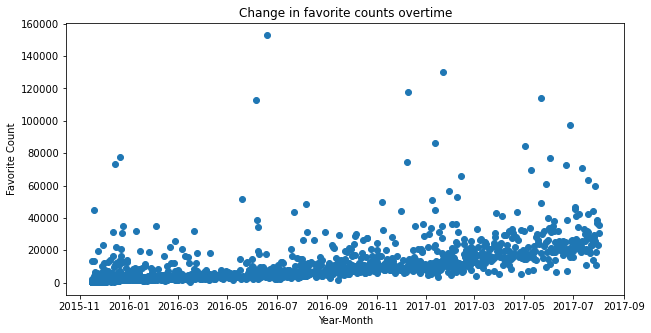

In [45]:
# Fixing figure size so print out is readable
plt.rcParams['figure.figsize'] = [10, 5]

#Plotting first visualization
plt.plot_date(twitter_archive_master.timestamp, twitter_archive_master.favorite_count, xdate=True, ydate=False)
plt.xlabel('Year-Month')
plt.ylabel('Favorite Count')
plt.title('Change in favorite counts overtime')
plt.show();

Text(0, 0.5, 'Total count number')

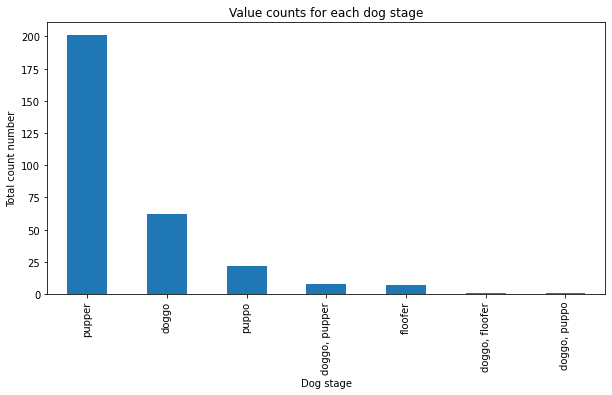

In [46]:
# Second visualization (set)
twitter_archive_master.stage.replace(r'^\s*$', np.nan, regex=True, inplace=True)
ax = twitter_archive_master.stage.value_counts(dropna=True).plot(kind='bar', title='Value counts for each dog stage')
ax.set_xlabel("Dog stage")
ax.set_ylabel("Total count number")

Text(0, 0.5, 'Average retweet count')

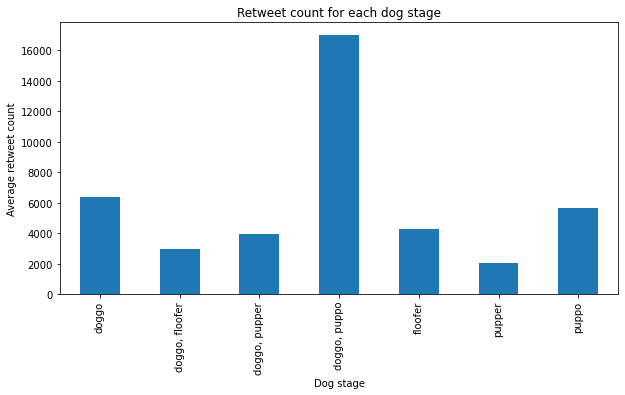

In [47]:
ax = twitter_archive_master.groupby('stage', as_index=True)['retweet_count'].mean().plot(
                                                                kind='bar', title="Retweet count for each dog stage",
                                                                figsize=(10,5))
ax.set_xlabel("Dog stage")
ax.set_ylabel("Average retweet count")

Text(0, 0.5, 'Number of predictions')

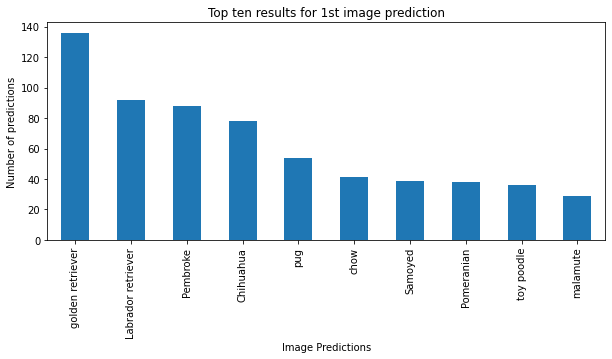

In [48]:
# Third visualization (set)
ax1 = twitter_archive_master.p1.value_counts().head(10).plot(kind='bar', 
                                                             title='Top ten results for 1st image prediction',
                                                             figsize=(10,4))
ax1.set_xlabel("Image Predictions")
ax1.set_ylabel("Number of predictions")

Text(0, 0.5, 'Number of predictions')

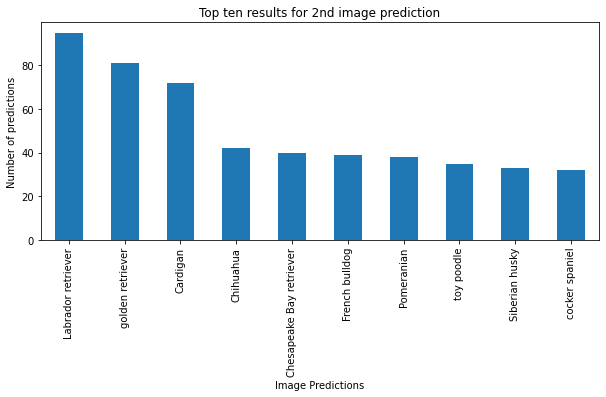

In [49]:
ax2 = twitter_archive_master.p2.value_counts().head(10).plot(kind='bar',
                                                             title='Top ten results for 2nd image prediction',
                                                             figsize=(10,4))
ax2.set_xlabel("Image Predictions")
ax2.set_ylabel("Number of predictions")

Text(0, 0.5, 'Number of predictions')

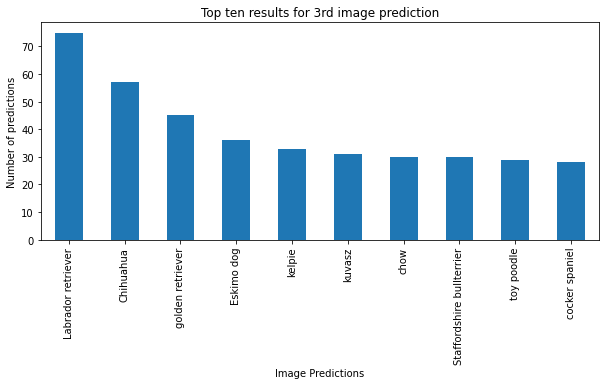

In [50]:
ax3 = twitter_archive_master.p3.value_counts().head(10).plot(kind='bar',
                                                             title='Top ten results for 3rd image prediction',
                                                             figsize=(10,4))
ax3.set_xlabel("Image Predictions")
ax3.set_ylabel("Number of predictions")

In [51]:
# A look at all three images prediction results sorted by favorite counts

p1_sorted = twitter_archive_master.groupby('p1', as_index=False)['favorite_count'].mean()
p1_sorted = p1_sorted.sort_values('favorite_count', ascending=False)

p2_sorted = twitter_archive_master.groupby('p2', as_index=False)['favorite_count'].mean()
p2_sorted = p2_sorted.sort_values('favorite_count', ascending=False)

p3_sorted = twitter_archive_master.groupby('p3', as_index=False)['favorite_count'].mean()
p3_sorted = p3_sorted.sort_values('favorite_count', ascending=False)

print(p1_sorted, p2_sorted, p3_sorted)

                   p1  favorite_count
221            laptop         60847.0
147             conch         43359.0
226         limousine         42663.0
7              Angora         42601.0
176          fountain         40949.0
..                ...             ...
269        piggy bank           305.0
349          trombone           274.0
197               hay           225.0
154      crash helmet           185.0
160  desktop computer            93.0

[373 rows x 2 columns]                   p2  favorite_count
215      house finch    74516.000000
236       leafhopper    73358.000000
275           palace    45028.000000
180         envelope    36192.666667
91             bagel    35457.000000
..               ...             ...
157           cornet      274.000000
189  giant schnauzer      203.000000
363          toaster      185.000000
230         komondor      103.000000
169             desk       93.000000

[397 rows x 2 columns]                 p3  favorite_count
164          conc